# Classificacao_Eletrofacies_Upper_A

Importação dos pacotes necessários para executar os algoritmos desse notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.colors
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression


Carregamento dos dados

In [2]:
P_96 = pd.read_csv('pocos_novos_atr/1-SPS-96-SP.csv', sep=';', header=(0))
P_1 = pd.read_csv('pocos_novos_atr/7-SPH-1-SPS.csv', sep=';', header=(0))
P_2D = pd.read_csv('pocos_novos_atr/7-SPH-2D-SPS.csv', sep=';', header=(0))
P_4D = pd.read_csv('pocos_novos_atr/7-SPH-4D-SPS.csv', sep=';', header=(0))
P_5 = pd.read_csv('pocos_novos_atr/7-SPH-5-SPS.csv', sep=';', header=(0))
P_7D = pd.read_csv('pocos_novos_atr/7-SPH-7D-SPS.csv', sep=';', header=(0))
P_8 = pd.read_csv('pocos_novos_atr/7-SPH-8-SPS.csv', sep=';', header=(0))
P_14D = pd.read_csv('pocos_novos_atr/7-SPH-14D-SPS.csv', sep=';', header=(0))
P_15D = pd.read_csv('pocos_novos_atr/7-SPH-15D-SPS.csv', sep=';', header=(0))

P_16D = pd.read_csv('pocos_novos_atr/7-SPH-16D-SPS.csv', sep=';', header=(0))
P_17 = pd.read_csv('pocos_novos_atr/7-SPH-17-SPS.csv', sep=';', header=(0))
P_20D = pd.read_csv('pocos_novos_atr/7-SPH-20D-SPS.csv', sep=';', header=(0))
P_22 = pd.read_csv('pocos_novos_atr/7-SPH-22-SPS.csv', sep=';', header=(0))
P_9 = pd.read_csv('pocos_novos_atr/8-SPH-9-SPS.csv', sep=';', header=(0))
P_10 = pd.read_csv('pocos_novos_atr/8-SPH-10-SPS.csv', sep=';', header=(0))
P_11 = pd.read_csv('pocos_novos_atr/8-SPH-11-SPS.csv', sep=';', header=(0))
P_12D = pd.read_csv('pocos_novos_atr/8-SPH-12DA-SPS.csv', sep=';', header=(0))

P_19D = pd.read_csv('pocos_novos_atr/8-SPH-19D-SPS.csv', sep=';', header=(0))
P_21D = pd.read_csv('pocos_novos_atr/8-SPH-21D-SPS.csv', sep=';', header=(0))
P_23 = pd.read_csv('pocos_novos_atr/8-SPH-23-SPS.csv', sep=';', header=(0))

P_923A = pd.read_csv('pocos_novos_atr/3-BRSA-923A-SPS.csv', sep=';', header=(0))
P_95 = pd.read_csv('pocos_novos_atr/9-SPS-95-SP.csv', sep=';', header=(0))
P_77 = pd.read_csv('pocos_novos_atr/9-SPS-77A-SP.csv', sep=';', header=(0))
P_SPH3 = pd.read_csv('pocos_novos_atr/7-SPH-3-SPS.csv', sep=';', header=(0))
P_594 = pd.read_csv('pocos_novos_atr/1-BRSA-594-SPS.csv', sep=';', header=(0))
P_788 = pd.read_csv('pocos_novos_atr/3-BRSA-788-SPS.csv', sep=';', header=(0))
P_SPH6 = pd.read_csv('pocos_novos_atr/7-SPH-6-SPS.csv', sep=';', header=(0))
P_97= pd.read_csv('pocos_novos_atr/9-SPS-97-SP.csv', sep=';', header=(0))


Pseudo_1 = pd.read_csv('pocos_novos_atr/Pseudo_3.csv', sep=';', header=(0))
Pseudo_2 = pd.read_csv('pocos_novos_atr/Pseudo_2.csv', sep=';', header=(0))
Pseudo_3 = pd.read_csv('pocos_novos_atr/Pseudo_3.csv', sep=';', header=(0))

data = pd.concat([P_923A,P_95,P_77,P_SPH3,P_594,P_788,P_SPH6,P_97,P_96,P_1,P_2D,P_4D,P_5,P_7D,P_8,P_14D,P_15D,P_16D,
                 P_17,P_20D,P_22,P_9,P_10,P_11,P_12D,P_19D,P_21D,P_23,Pseudo_1,Pseudo_2,Pseudo_3],axis=0)


Filtragem e tratamento de valores faltantes do dataset

In [3]:
MD = data.MD;
data.drop(['MD','UpscaledThinLayerRemovalSimp','Ele5','EleSimp', 'Ele','EleSimp5','AMPCONS', 'RMS'], axis=1, inplace = True)

In [4]:
data.dropna(axis=0, inplace=True)

In [5]:
data

UpscaledThinLayerRemoval   INSPHASE           RAI      FLAT  \
0                            2   9.488308  60025.113280  0.064079   
1                            2  10.185534  61874.082030  0.063850   
2                            2  10.882762  63723.046880  0.063620   
3                            2  11.579992  65572.000000  0.063390   
4                            2  12.277225  67420.945310  0.063160   
...                        ...        ...           ...       ...   
3138                         1   0.538154   8964.542969  0.051398   
3139                         1   1.525225   9029.982422  0.050981   
3140                         1   2.512296   9095.422852  0.050564   
3141                         1   3.499367   9160.862305  0.050147   
3142                         1   4.486438   9226.302734  0.049731   

                SWT  
0     102418.843800  
1     102324.257800  
2     102229.664100  
3     102135.062500  
4     102040.445300  
...             ...  
3138    6556.254395  
3139    6487.560547  
3140    6418.866211  
3141    6350.172363  
3142    6281.478516  

[68024 rows x 5 columns]

Visualização de correlação entre os atributos sísmicos e as eletrofácies

<AxesSubplot:>

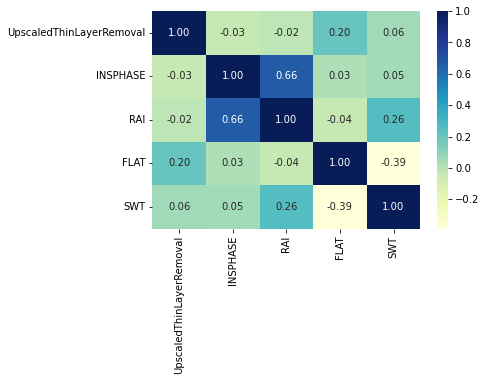

In [6]:
matrix = data.corr()
sns.heatmap(matrix, cmap = "YlGnBu", annot = True, fmt = '.2f')

Separação do conjunto de características e o label de eletrofácies

In [7]:
data2 = data.to_numpy()  
nrow,ncol = data2.shape
y = data2[:,0]
X = data2[:,1:ncol]

Visualização de atributos e de eletrofácies, empilhados nos poços

Text(0.5, 1.0, 'SWT')

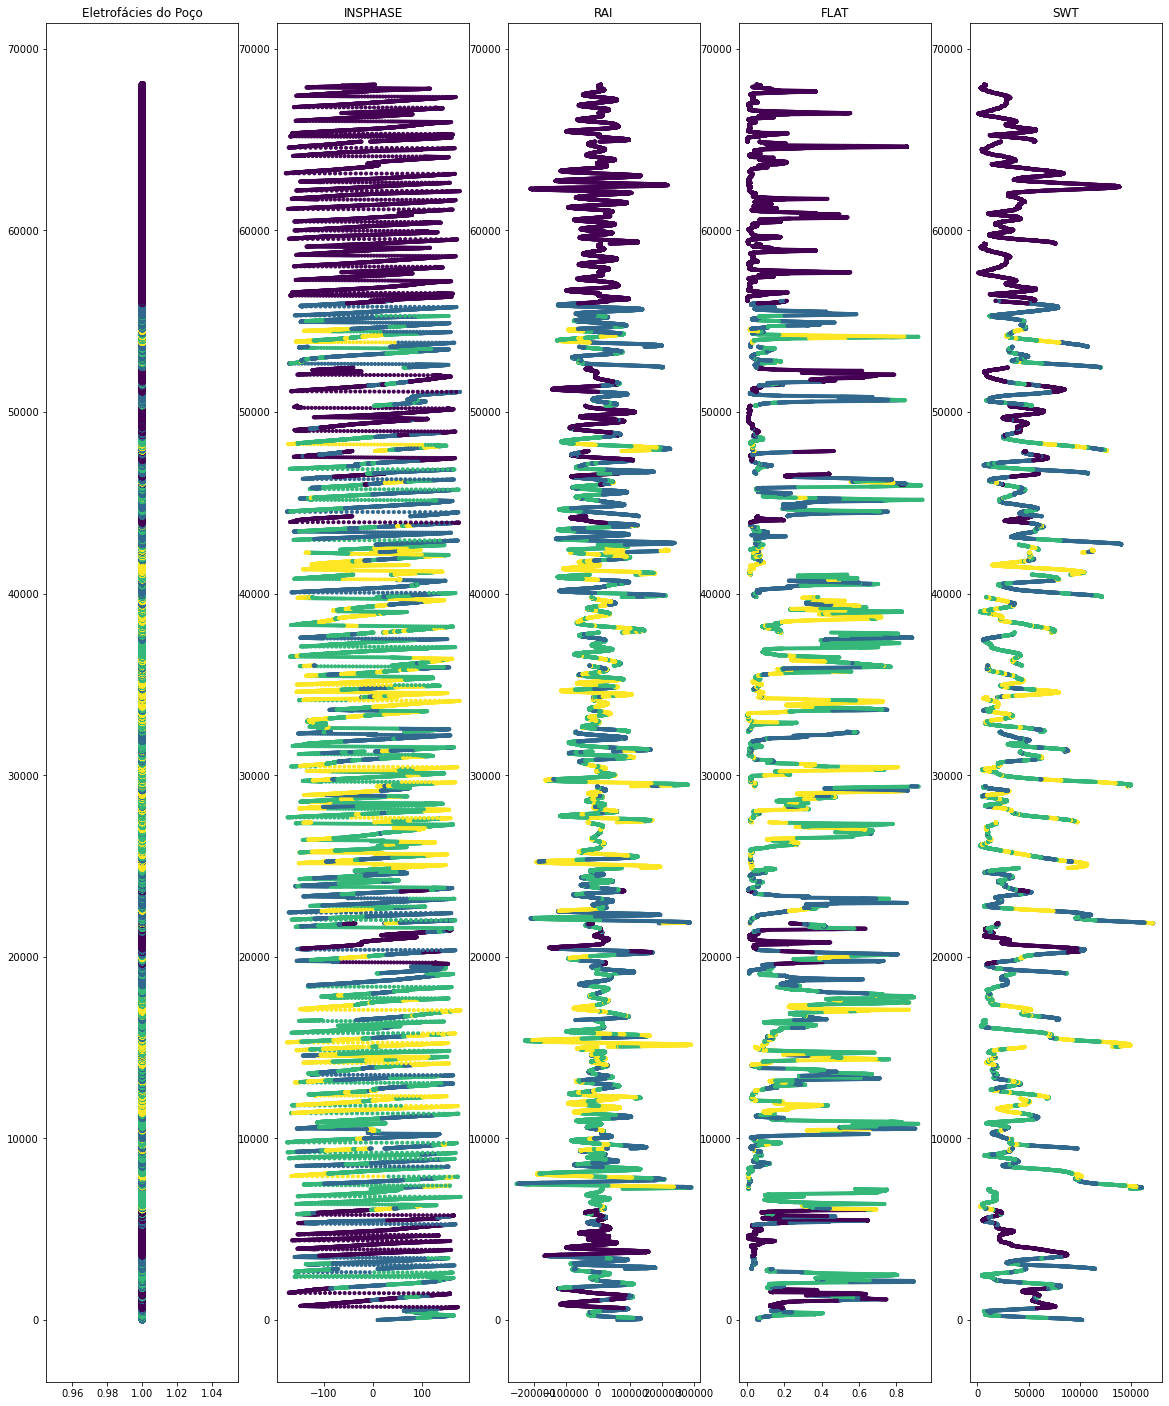

In [8]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5,figsize = (20,25))

ax1.scatter(np.ones(len(y)),np.arange(0, len(y) , 1, dtype = int), c = y ) 
ax1.set_title('Eletrofácies do Poço') 

ax2.scatter(X[:,0],np.arange(0, len(y) , 1, dtype = int), c = y, marker = '.')
ax2.set_title('INSPHASE')

ax3.scatter(X[:,1],np.arange(0, len(y) , 1, dtype = int), c = y, marker = '.')
ax3.set_title('RAI')

ax4.scatter(X[:,2],np.arange(0, len(y) , 1, dtype = int), c = y, marker = '.')
ax4.set_title('FLAT')

ax5.scatter(X[:,3],np.arange(0, len(y) , 1, dtype = int), c = y, marker = '.')
ax5.set_title('SWT')


Histograma de frequências de cada atributos nos poços

Text(0.5, 1.0, 'SWT')

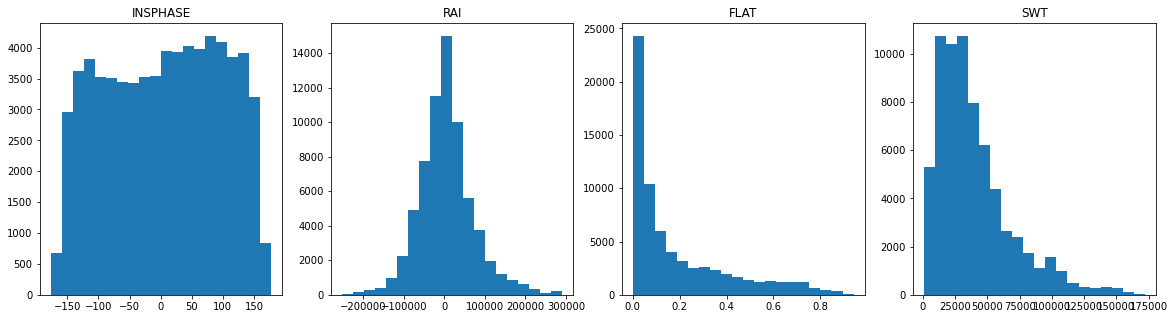

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,5))
ax1.hist(X[:,0], bins = 20)
ax1.set_title('INSPHASE')
ax2.hist(X[:,1], bins = 20)
ax2.set_title('RAI')
ax3.hist(X[:,2], bins = 20)
ax3.set_title('FLAT')
ax4.hist(X[:,3], bins = 20)
ax4.set_title('SWT')

### Preparação dos Dados

#### Ajuste dos dados de poço

Padronização/Normalização

In [10]:
#scaler = StandardScaler().fit(X)
#X = scaler.transform(X)

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

Histograma de frequências de cada atributos nos poços após a padronização

Text(0.5, 1.0, 'SWT')

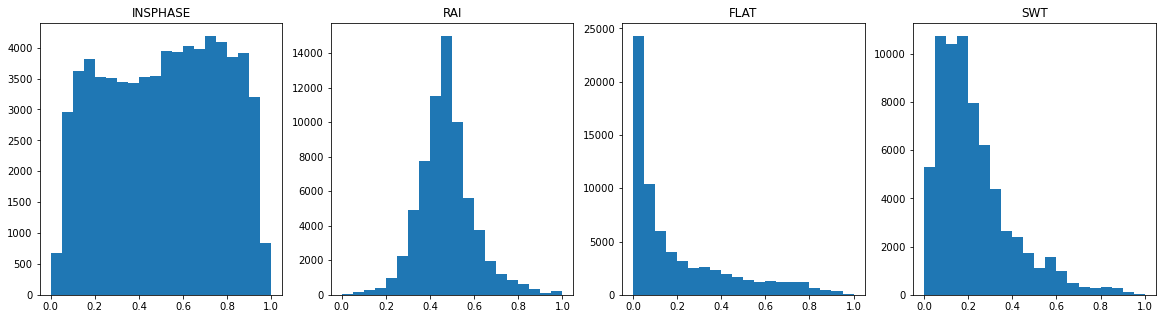

In [24]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,5))
ax1.hist(X[:,0], bins = 20)
ax1.set_title('INSPHASE')
ax2.hist(X[:,1], bins = 20)
ax2.set_title('RAI')
ax3.hist(X[:,2], bins = 20)
ax3.set_title('FLAT')
ax4.hist(X[:,3], bins = 20)
ax4.set_title('SWT')

Separação do dataset em conjuntos de treino e teste

In [12]:
p = 0.7 # fracao de elementos no conjunto de treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

#### Ajuste dos dados de Superfície

Leitura e visualização dos atributos de superfície. A nomenclatura está de acordo com os critérios utilizados pelo geofísico para separação de unidades na sísmica.

Text(0.5, 1.0, 'UnitAUpperSweetnessMean')

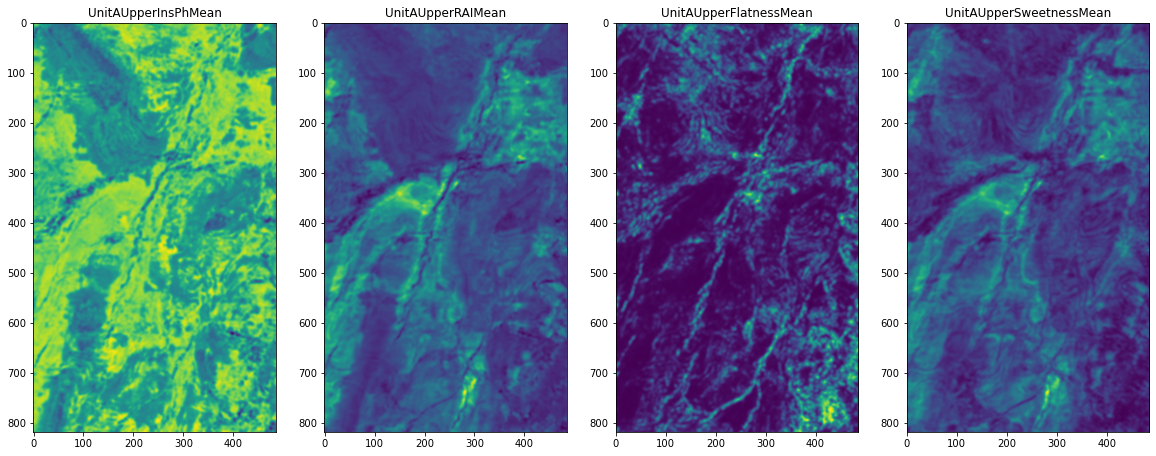

In [13]:
UnitAUpperInsPhMean = pd.read_table('atributos_novos/A_Upper/UnitAUpperInsPhMean.txt')
UnitAUpperRAIMean = pd.read_table('atributos_novos/A_Upper/UnitAUpperRAIMean.txt')
UnitAUpperFlatnessMean = pd.read_table('atributos_novos/A_Upper/UnitAUpperFlatnessMean.txt')
UnitAUpperSweetnessMean = pd.read_table('atributos_novos/A_Upper/UnitAUpperSweetnessMean.txt')


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,15))
ax1.imshow(np.flipud((UnitAUpperInsPhMean)))
ax1.set_title('UnitAUpperInsPhMean')
ax2.imshow(np.flipud((UnitAUpperRAIMean)))
ax2.set_title('UnitAUpperRAIMean')
ax3.imshow(np.flipud((UnitAUpperFlatnessMean)))
ax3.set_title('UnitAUpperFlatnessMean')
ax4.imshow(np.flipud((UnitAUpperSweetnessMean)))
ax4.set_title('UnitAUpperSweetnessMean')


Histograma de frequências de cada atributos nos poços em superfície

Text(0.5, 1.0, 'UnitAUpperSweetnessMean')

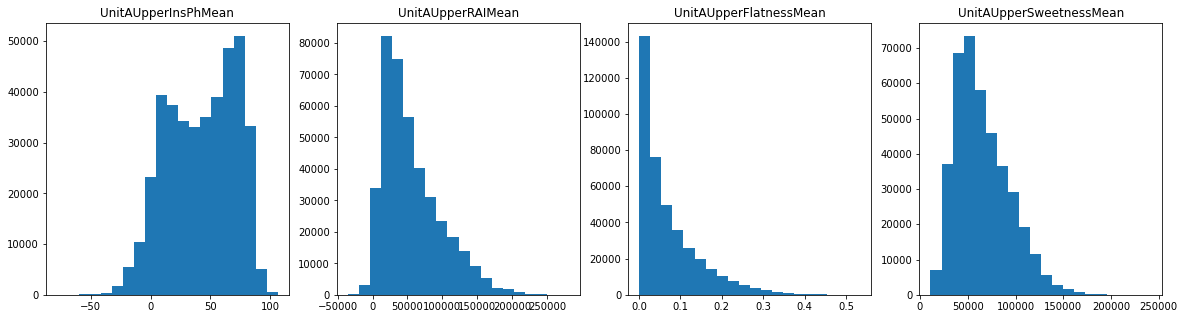

In [14]:
UnitAUpperInsPhMean.fillna(0,inplace=True)
UnitAUpperRAIMean.fillna(0,inplace=True)
UnitAUpperFlatnessMean.fillna(0,inplace=True)
UnitAUpperSweetnessMean.fillna(0,inplace=True)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(20,5))
ax1.hist(np.reshape(UnitAUpperInsPhMean.to_numpy(), 398034 ).reshape(-1,1),bins=20)
ax1.set_title('UnitAUpperInsPhMean')
ax2.hist(np.reshape(UnitAUpperRAIMean.to_numpy(), 398034 ).reshape(-1,1),bins=20)
ax2.set_title('UnitAUpperRAIMean')
ax3.hist(np.reshape(UnitAUpperFlatnessMean.to_numpy(), 398034  ).reshape(-1,1),bins=20)
ax3.set_title('UnitAUpperFlatnessMean')
ax4.hist(np.reshape(UnitAUpperSweetnessMean.to_numpy(), 398034  ).reshape(-1,1),bins=20)
ax4.set_title('UnitAUpperSweetnessMean')

Transformação dos dados de superfície em vetores colunas, para adequação a estrutura de dados dos poços

In [15]:
UnitAUpperInsPhMean = UnitAUpperInsPhMean.to_numpy()
UnitAUpperRAIMean = UnitAUpperRAIMean.to_numpy()
UnitAUpperFlatnessMean = UnitAUpperFlatnessMean.to_numpy()
UnitAUpperSweetnessMean = UnitAUpperSweetnessMean.to_numpy()


UnitAUpperInsPhMean_flat = np.reshape(UnitAUpperInsPhMean, 398034).reshape(-1,1)
UnitAUpperRAIMean_flat = np.reshape(UnitAUpperRAIMean, 398034).reshape(-1,1)
UnitAUpperFlatnessMean_flat = np.reshape(UnitAUpperFlatnessMean, 398034).reshape(-1,1)
UnitAUpperSweetnessMean_flat = np.reshape(UnitAUpperSweetnessMean, 398034).reshape(-1,1)

atributos_flat = np.concatenate([UnitAUpperInsPhMean_flat, UnitAUpperRAIMean_flat, UnitAUpperFlatnessMean_flat,
                                 UnitAUpperSweetnessMean_flat ],axis=1)



Padronização/Normalização

In [16]:
#scaler = StandardScaler().fit(atributos_flat)
#atributos_flat = scaler.transform(atributos_flat)

min_max_scaler = preprocessing.MinMaxScaler()
atributos_flat = min_max_scaler.fit_transform(atributos_flat)

## Modelos de Machine Learning

### Modelo 1 
#### KNN + Grid Search

In [17]:
knn2 = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 10)}

knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [18]:
knn_gscv.best_params_

{'n_neighbors': 1}

In [19]:
knn_gscv.best_score_

0.9724462091667544

Verificação da qualidade do modelo

In [20]:
y_pred = knn_gscv.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.98      0.98      0.98      5915
         2.0       0.98      0.98      0.98      5047
         3.0       0.97      0.98      0.97      6242
         4.0       0.96      0.97      0.96      3204

    accuracy                           0.98     20408
   macro avg       0.97      0.97      0.97     20408
weighted avg       0.98      0.98      0.98     20408



<AxesSubplot:>

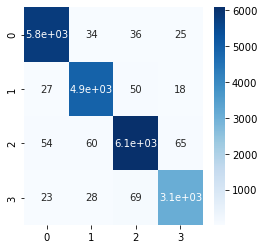

In [21]:
cm = confusion_matrix(y_pred, y_test)
fig = plt.figure(figsize = (4,4))
sns.heatmap(cm, annot = True, cmap = 'Blues')

### Modelo 2
#### Pipeline (PCA/LDA) + KNN

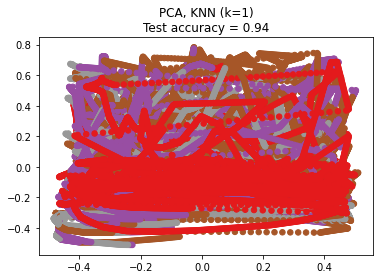

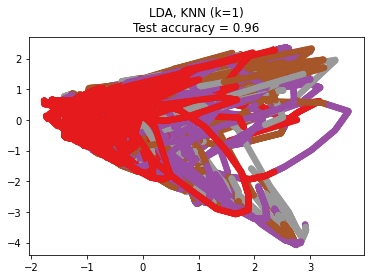

In [22]:
n_neighbors = 1
random_state = 0

dim = len(X[0])
n_classes = len(np.unique(y))

# Redução de dimensão para 3 com PCA
pca = make_pipeline(MinMaxScaler(), PCA(n_components=3, random_state=random_state))

# Redução de dimensão para 3 com LinearDiscriminantAnalysis
lda = make_pipeline(MinMaxScaler(), LinearDiscriminantAnalysis(n_components=3))

# Redução de dimensão para 3 com NeighborhoodComponentAnalysis
#nca = make_pipeline(
#    MinMaxScaler(),
#    NeighborhoodComponentsAnalysis(n_components=3, random_state=random_state),
#)


knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Cria uma lista de métodos para serem comparados
dim_reduction_methods = [("PCA", pca), ("LDA", lda)]#, ("NCA", nca)]


for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()

    # Fit do método
    model.fit(X_train, y_train)

    
    knn.fit(model.transform(X_train), y_train)

    
    acc_knn = knn.score(model.transform(X_test), y_test)

    
    X_embedded = model.transform(X)

    
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap="Set1")
    plt.title(
        "{}, KNN (k={})\nTest accuracy = {:.2f}".format(name, n_neighbors, acc_knn)
    )
plt.show()



### Modelo 3
#### RandonForest + RandonSearch

In [23]:
forest_clf = RandomForestClassifier()

# Criação de um dicionário para informar quais são os hiperparâmetros
param_space = {'bootstrap': [True],
             'max_depth': [40],
             'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_leaf': [2, 3, 4],
             'min_samples_split': [2, 3, 4, 5],
             'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
             }

forest_random_search = RandomizedSearchCV(forest_clf, param_space, n_iter=20,
                                  scoring = 'accuracy',
                                  verbose = True,
                                  cv = 5,
                                  n_jobs = -1,
                                  random_state = 42)

forest_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True], 'max_depth': [40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='accuracy', verbose=True)

In [25]:
forest_random_search.best_params_

{'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 40,
 'bootstrap': True}

Verificação da qualidade do modelo

In [26]:
y_pred=forest_random_search.predict(X_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.9865248921991376


### Modelo 4

In [27]:
logisticRegr = LogisticRegression(solver = 'saga',penalty = 'elasticnet', class_weight = 'balanced',l1_ratio=1)

logisticRegr.fit(X_train, y_train)

logisticRegr.score(X_test, y_test) #qualidade do modelo

0.41390631125049

# Resultados

### Modelo 1

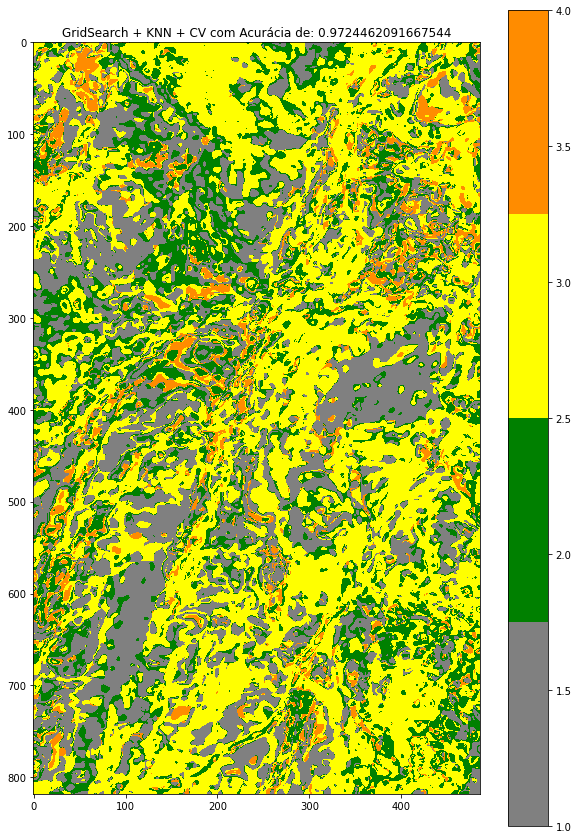

In [28]:
colors = ['grey','green','yellow','darkorange']
y_knn_gscv = knn_gscv.predict(atributos_flat)
saida1 = np.reshape(y_knn_gscv, (819, 486))
fig = plt.figure(figsize = (10,15))
plt.imshow(np.flipud((saida1)),cmap=matplotlib.colors.ListedColormap(colors))
plt.title('GridSearch + KNN + CV com Acurácia de: '+str(knn_gscv.best_score_))
plt.colorbar()

Se desejar salvar a classificação em txt, basta descomentar a célula abaixo

In [30]:
#from numpy import savetxt
#savetxt('Eletrofacies_Upper_A.csv', np.flipud(saida1), delimiter=',')

Text(0.5, 1.0, 'Histograma das classes')

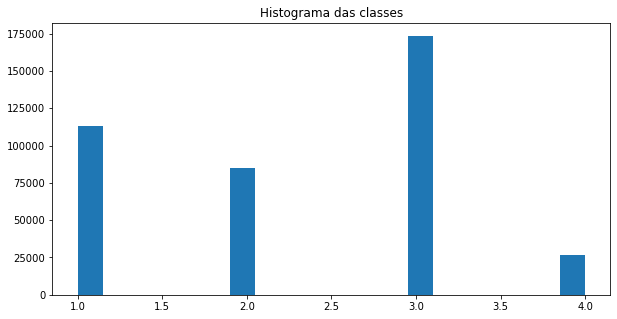

In [30]:
fig, ax = plt.subplots(1, 1,figsize=(10,5))
ax.hist(y_knn_gscv,bins=20)
ax.set_title('Histograma das classes')

### Modelo 2

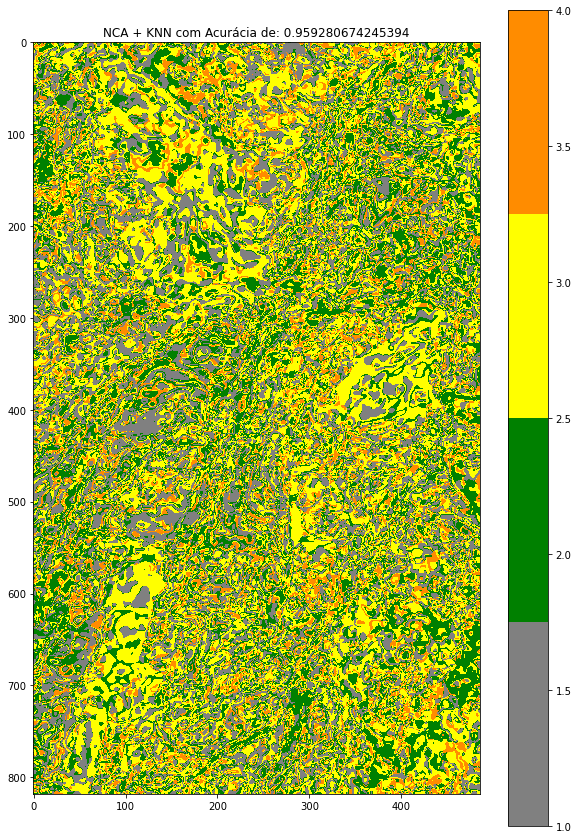

In [31]:
y_knn_nca = knn.predict(model.transform(atributos_flat))
saida2 = np.reshape(y_knn_nca, (819, 486)) 
fig = plt.figure(figsize=(10,15))
plt.imshow(np.flipud((saida2)),cmap=matplotlib.colors.ListedColormap(colors))
plt.title('NCA + KNN com Acurácia de: '+str(acc_knn))
plt.colorbar()

Text(0.5, 1.0, 'Histograma das classes')

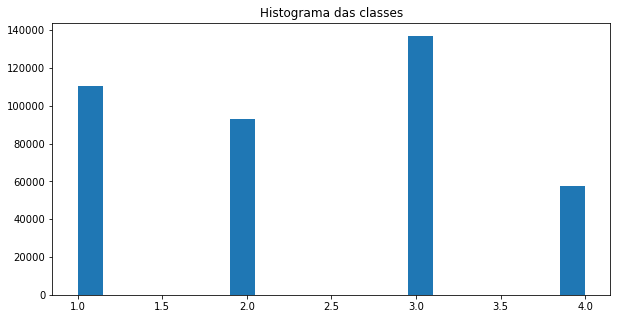

In [32]:
fig, ax = plt.subplots(1, 1,figsize=(10,5))
ax.hist(y_knn_nca,bins=20)
ax.set_title('Histograma das classes')

### Modelo 3

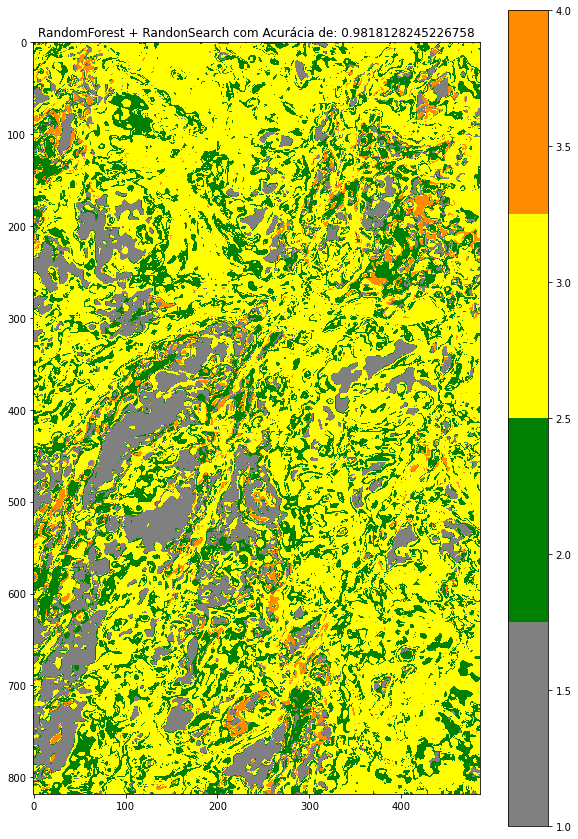

In [33]:
y_random_for = forest_random_search.predict(atributos_flat) 
saida3 = np.reshape(y_random_for, (819, 486))
fig = plt.figure(figsize=(10,15))
plt.imshow(np.flipud((saida3)),cmap=matplotlib.colors.ListedColormap(colors))
plt.title('RandomForest + RandonSearch com Acurácia de: '+str(forest_random_search.best_score_))
plt.colorbar()

In [34]:
#from numpy import savetxt
#savetxt('data.csv', saida3, delimiter=',')

A fim de evitar ruído no mapa classificação é possível utilizar um filtro Gaussiano, conforme célula abaixo

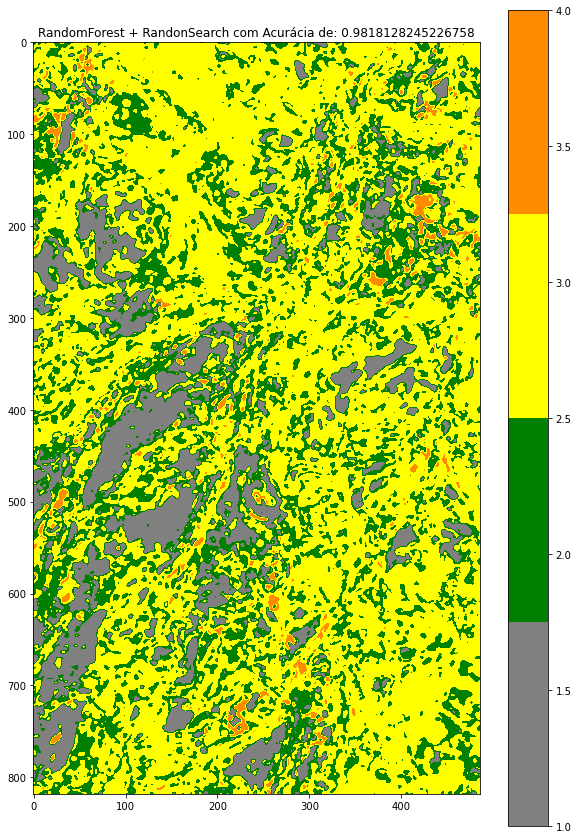

In [35]:
from scipy.ndimage import gaussian_filter
fig = plt.figure(figsize=(10,15))
plt.imshow((gaussian_filter(np.flipud((saida3)),sigma=1)),cmap=matplotlib.colors.ListedColormap(colors))
plt.title('RandomForest + RandonSearch com Acurácia de: '+str(forest_random_search.best_score_))
plt.colorbar()

In [37]:
#from numpy import savetxt
#savetxt('data_fil.csv', gaussian_filter(np.flipud((saida3)),sigma=1), delimiter=',')

Text(0.5, 1.0, 'Histograma das classes')

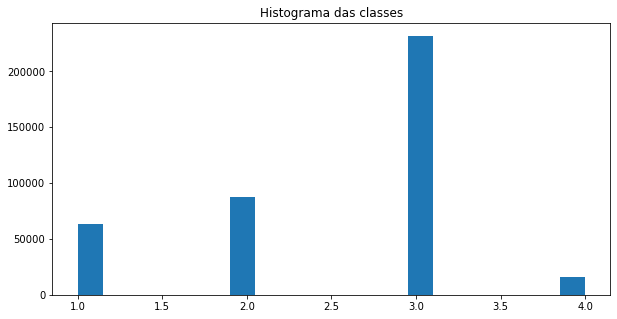

In [38]:
fig, ax = plt.subplots(1, 1,figsize=(10,5))
ax.hist(y_random_for,bins=20)
ax.set_title('Histograma das classes')

### Modelo 4

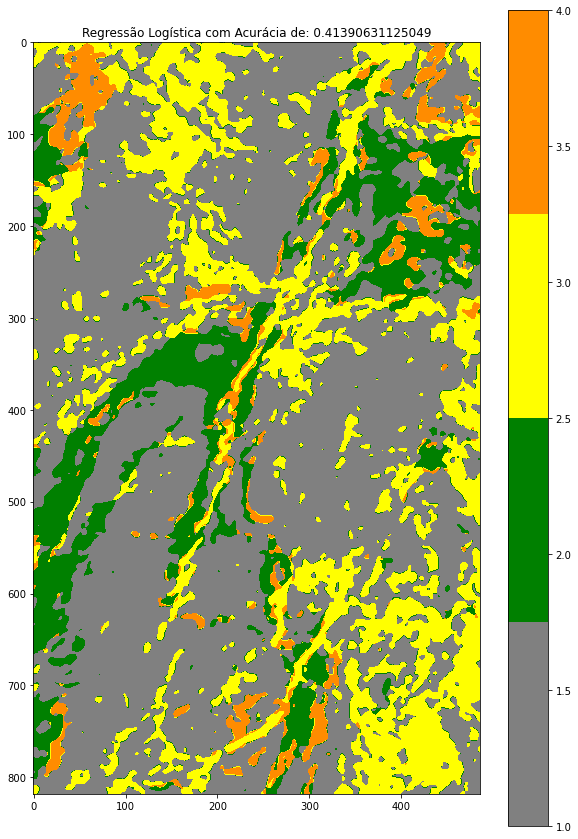

In [36]:
colors = ['grey','green','yellow','darkorange']
y_knn_gscv = logisticRegr.predict(atributos_flat)
saida4 = np.reshape(y_knn_gscv, (819, 486))
fig = plt.figure(figsize=(10,15))
plt.imshow(np.flipud((saida4)),cmap=matplotlib.colors.ListedColormap(colors))
plt.title('Regressão Logística com Acurácia de: '+str(logisticRegr.score(X_test, y_test)))
plt.colorbar()

In [41]:
#from numpy import savetxt
#savetxt('Upper_A.csv', saida4, delimiter=',')

Para fins exploratórios é possível visualizar os mapas de probabilidades de eletrofácies segundo a regressão logística

In [37]:
p = logisticRegr.predict_proba(atributos_flat)
E1 = p[:,0]
E2 = p[:,1]
E3 = p[:,2]
E4 = p[:,3]

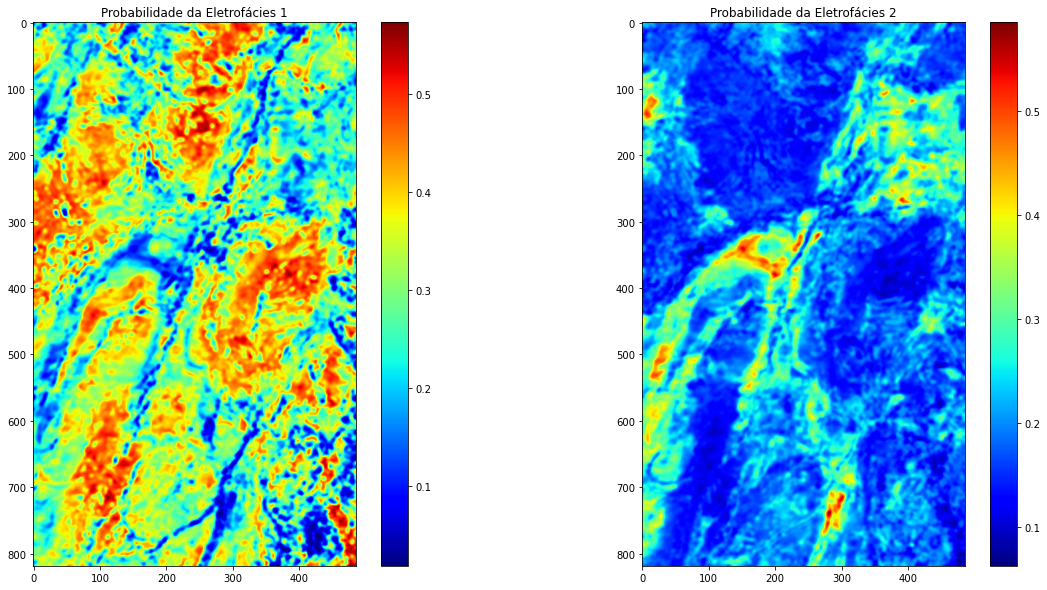

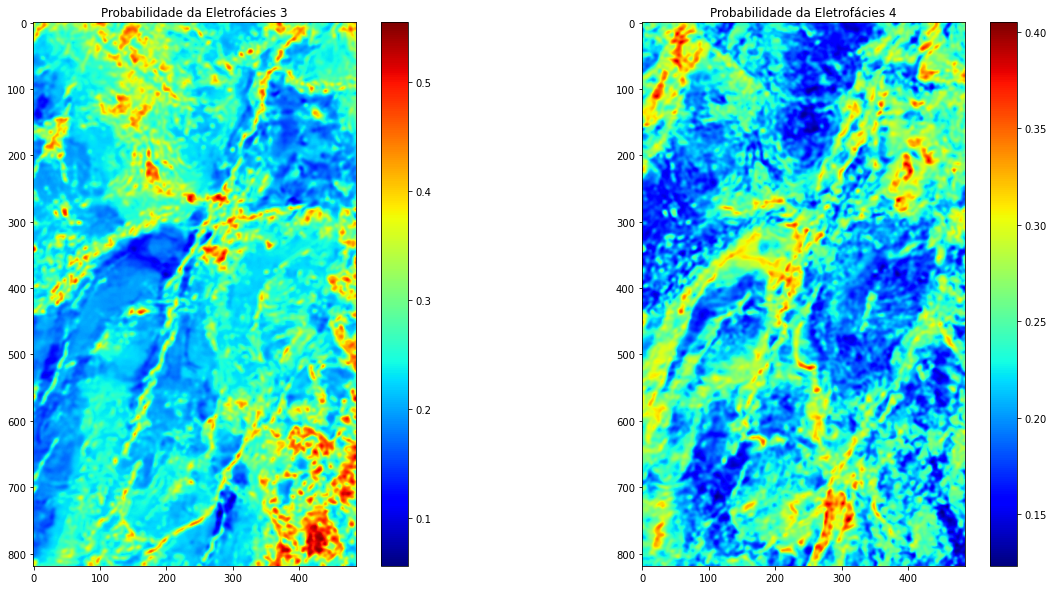

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))

img1 = ax1.imshow(np.flipud(np.reshape(E1, (819, 486))),cmap = 'jet')
ax1.set_title('Probabilidade da Eletrofácies 1')
plt.colorbar(img1, ax = ax1)

img2 = ax2.imshow(np.flipud(np.reshape(E2, (819, 486))),cmap = 'jet')
ax2.set_title('Probabilidade da Eletrofácies 2')
plt.colorbar(img2, ax = ax2)

fig, (ax3, ax4) = plt.subplots(1, 2,figsize=(20,10))

img3 = ax3.imshow(np.flipud(np.reshape(E3, (819, 486))), cmap = 'jet')
ax3.set_title('Probabilidade da Eletrofácies 3')
plt.colorbar(img3, ax = ax3)

img4 = ax4.imshow(np.flipud(np.reshape(E4, (819, 486))), cmap = 'jet')
ax4.set_title('Probabilidade da Eletrofácies 4')
plt.colorbar(img4, ax = ax4)

Visualização dos modelos apresentados, juntamento com o modelo deposicional proposto

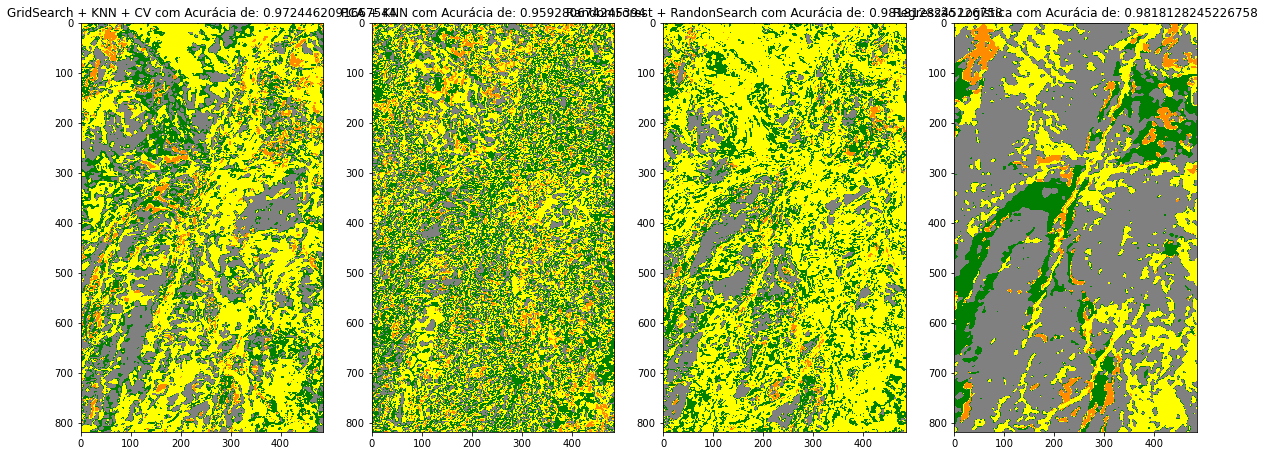

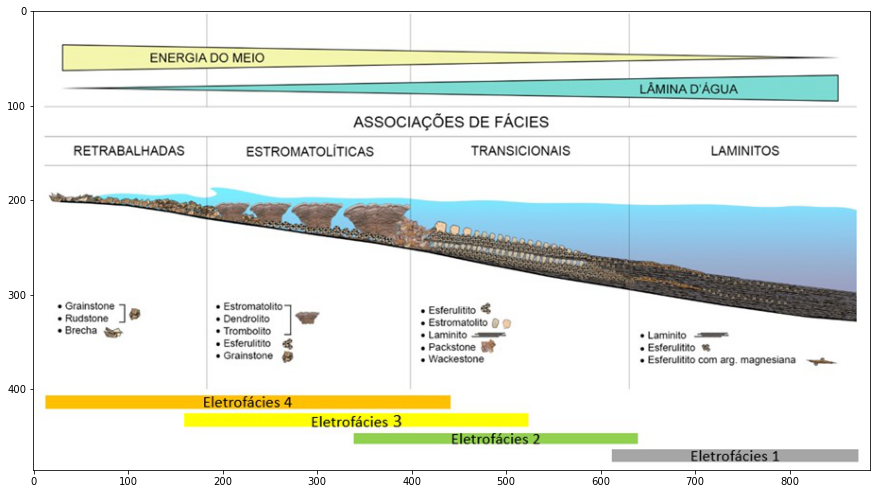

In [40]:
fig, (ax1, ax2, ax3, ax4 ) = plt.subplots(1, 4,figsize=(20,20))

ax1.imshow(np.flipud((saida1)),cmap=matplotlib.colors.ListedColormap(colors))
ax1.set_title('GridSearch + KNN + CV com Acurácia de: '+str(knn_gscv.best_score_))
#ax1.colorbar()

ax2.imshow(np.flipud((saida2)),cmap=matplotlib.colors.ListedColormap(colors))
ax2.set_title('PCA + KNN com Acurácia de: '+str(acc_knn))
#ax2.colorbar()

ax3.imshow(np.flipud((saida3)),cmap=matplotlib.colors.ListedColormap(colors))
ax3.set_title('RandomForest + RandonSearch com Acurácia de: '+str(forest_random_search.best_score_))
#ax3.colorbar()

ax4.imshow(np.flipud((saida4)),cmap=matplotlib.colors.ListedColormap(colors))
ax4.set_title('Regressão Logística com Acurácia de: '+str(forest_random_search.best_score_))


img = plt.imread('Eletrofacies.jpg')
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()
ax.imshow(img)